# Punto 10
Determinar el Texto Plano y la Llave del Texto Cifrado que se Muestra a Continuación:

$$ MXDXBVTZWVMXNSPBQXLIMSCCSGXSCJXBOVQXCJZMOJZCVC $$
$$ TVWJCZAAXZBCSSCJXBQCJZCOJZCNSPOXBXSBTVWJCJZDXG $$
$$ XXMOZQMSCSCJXBOVQXCJZMOJZCNSPJZHGXXMOSPLHJZDXZ $$
$$ AAXZBXHCSCJXTCSGXSCJXBOVQX $$

*Pista:* El mensaje fue encriptado con un cifrador de sustitución simple y el Texto Plano no tiene espacios ni puntuación.

Podemos solucionarlo mediante análisis de frecuencias

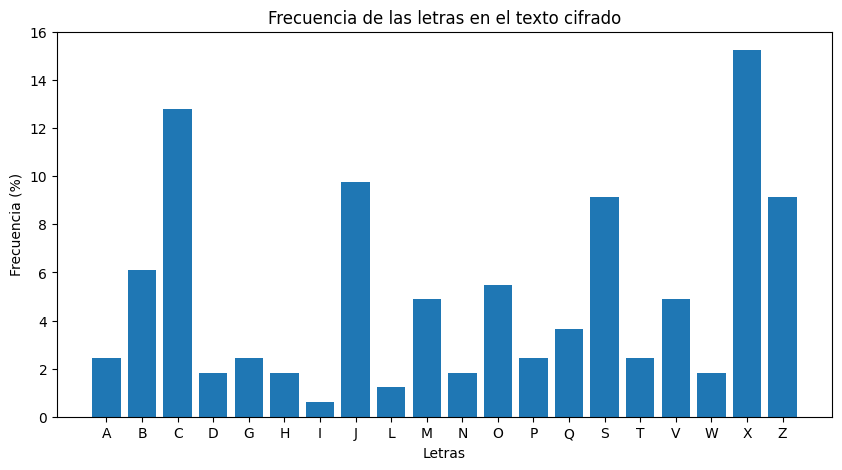

In [1]:
import matplotlib.pyplot as plt
from collections import Counter

# Definimos el texto cifrado
texto_cifrado = 'MXDXBVTZWVMXNSPBQXLIMSCCSGXSCJXBOVQXCJZMOJZCVCTVWJCZAAXZBCSSCJXBQCJZCOJZCNSPOXBXSBTVWJCJZDXGXXMOZQMSCSCJXBOVQXCJZMOJZCNSPJZHGXXMOSPLHJZDXZAAXZBXHCSCJXTCSGXSCJXBOVQX'

# Definir la frecuencia de las letras en el idioma inglés
frecuencias_ingles = {
    'A': 8.000395, 'B': 1.535701, 'C': 2.575785, 'D': 4.317924, 'E': 12.575645,
    'F': 2.350463, 'G': 1.982677, 'H': 6.236609, 'I': 6.920007, 'J': 0.145188,
    'K': 0.739906, 'L': 4.057231, 'M': 2.560994, 'N': 6.903785, 'O': 7.591270,
    'P': 1.795742, 'Q': 0.117571, 'R': 5.959034, 'S': 6.340880, 'T': 9.085226,
    'U': 2.841783, 'V': 0.981717, 'W': 2.224893, 'X': 0.179556, 'Y': 1.900888,
    'Z': 0.079130
}

# Definir una función para calcular la frecuencia de los n-gramas
def contar_ngramas(texto, n):
    ngramas = [texto[i:i+n] for i in range(len(texto) - n + 1)]
    ngramas_frecuencia = Counter(ngramas)
    return ngramas_frecuencia

# Hallar las frecuencias de las letras
frecuencias_letras = contar_ngramas(texto_cifrado, 1)

# Calcular la frecuencia de las letras en el texto cifrado
frecuencias_letras = dict(sorted(frecuencias_letras.items()))
frecuencias_letras = {k: v / len(texto_cifrado) * 100 for k, v in frecuencias_letras.items()}
frecuencias_letras = dict(sorted(frecuencias_letras.items()))

# Plotear las frecuencias de las letras en el texto cifrado
plt.figure(figsize=(10, 5))
plt.bar(frecuencias_letras.keys(), frecuencias_letras.values())
plt.xlabel('Letras')
plt.ylabel('Frecuencia (%)')
plt.title('Frecuencia de las letras en el texto cifrado')
plt.show()

Ya tenemos las frecuencias de las letras en nuestro texto. Ahora, vamos a compararlas con las frecuencias de las letras en el idioma inglés.

In [34]:
# Definir función que imprima en orden descendente n frecuencias del texto cifrado y del idioma inglés
def imprimir_frecuencias(frecuencias_texto, frecuencias_idioma, n):
    # Ordenar las frecuencias del texto cifrado
    frecuencias_texto = sorted(frecuencias_texto.items(), key=lambda item: item[1], reverse=True)[:n]
    # Ordenar las frecuencias del idioma inglés
    frecuencias_idioma = sorted(frecuencias_idioma.items(), key=lambda item: item[1], reverse=True)[:n]
    
    print(f"{'Texto Cifrado':<15} {'Frecuencia (%)':<25} {'Idioma':<15} {'Frecuencia (%)'}")
    print('-' * 75)
    
    for i in range(min(n, len(frecuencias_texto), len(frecuencias_idioma))):
        textocrifrado, textocifrado_frec = frecuencias_texto[i]
        textoingles, textoingles_frec = frecuencias_idioma[i]
        
        print(f"{textocrifrado:<15} {textocifrado_frec:<25.2f} {textoingles:<15} {textoingles_frec}")
        
# Imprimir las frecuencias de las letras en el texto cifrado y en el idioma inglés
imprimir_frecuencias(frecuencias_letras, frecuencias_ingles, 26)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
X               15.24                     E               12.575645
C               12.80                     T               9.085226
J               9.76                      A               8.000395
S               9.15                      O               7.59127
Z               9.15                      I               6.920007
B               6.10                      N               6.903785
O               5.49                      S               6.34088
M               4.88                      H               6.236609
V               4.88                      R               5.959034
Q               3.66                      D               4.317924
A               2.44                      L               4.057231
G               2.44                      U               2.841783
P               2.44                      C     

Ahora realicemos el análisis con los bigramas, trigramas y cuatrigramas.


In [3]:
# Hallar las frecuencias de los bigramas
bigrams_ingles = {
    'TH': 3.882543, 'HE': 3.681391, 'IN': 2.283899, 'ER': 2.178042, 'AN': 2.140460,
    'RE': 1.749394, 'ND': 1.571977, 'ON': 1.418244, 'EN': 1.383239, 'AT': 1.335523,
    'OU': 1.285484, 'ED': 1.275779, 'HA': 1.274742, 'TO': 1.169655, 'OR': 1.151094,
    'IT': 1.134891, 'IS': 1.109877, 'HI': 1.092302, 'ES': 1.092301, 'NG': 1.053385
}

texto_cifrado_bigrams = contar_ngramas(texto_cifrado, 2)

# Calcular la frecuencia de los bigramas en el texto cifrado
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))
texto_cifrado_bigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_bigrams.items()}
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))

# Imprimir las frecuencias de los bigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_bigrams, bigrams_ingles, 15)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
CJ              5.49                      TH              3.882543
JZ              5.49                      HE              3.681391
SC              4.27                      IN              2.283899
XB              3.66                      ER              2.178042
CS              3.05                      AN              2.14046
JX              3.05                      RE              1.749394
GX              2.44                      ND              1.571977
MO              2.44                      ON              1.418244
QX              2.44                      EN              1.383239
SP              2.44                      AT              1.335523
ZC              2.44                      OU              1.285484
BO              1.83                      ED              1.275779
DX              1.83                      HA    

In [4]:
# Hallar las frecuencias de los trigramas
trigramas_ingles = {
    'THE': 3.508232,
    'AND': 1.593878,
    'ING': 1.147042,
    'HER': 0.822444,
    'HAT': 0.650715,
    'HIS': 0.596748,
    'THA': 0.593593,
    'ERE': 0.560594,
    'FOR': 0.555372,
    'ENT': 0.530771,
    'ION': 0.506454,
    'TER': 0.461099,
    'WAS': 0.460487,
    'YOU': 0.437213,
    'ITH': 0.431250,
    'VER': 0.430732,
    'ALL': 0.422758,
    'WIT': 0.397290,
    'THI': 0.394796,
    'TIO': 0.378058
}

texto_cifrado_trigrams = contar_ngramas(texto_cifrado, 3)

# Calcular la frecuencia de los trigramas en el texto cifrado
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))
texto_cifrado_trigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_trigrams.items()}
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))

# Imprimir las frecuencias de los trigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_trigrams, trigramas_ingles, 20)


Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
CJX             3.05                      THE             3.508232
SCJ             3.05                      AND             1.593878
CJZ             2.44                      ING             1.147042
JXB             2.44                      HER             0.822444
JZC             2.44                      HAT             0.650715
BOV             1.83                      HIS             0.596748
NSP             1.83                      THA             0.593593
OJZ             1.83                      ERE             0.560594
OVQ             1.83                      FOR             0.555372
VQX             1.83                      ENT             0.530771
XBO             1.83                      ION             0.506454
AAX             1.22                      TER             0.461099
AXZ             1.22                      WAS  

In [5]:
# Hallar las frecuencias de los cuatrigramas
cuatrigramas_ingles = {
    "THAT": 0.761242,
    "THER": 0.604501,
    "WITH": 0.573866,
    "TION": 0.551919,
    "HERE": 0.374549,
    "OULD": 0.369920,
    "IGHT": 0.309440,
    "HAVE": 0.290544,
    "HICH": 0.284292,
    "WHIC": 0.283826,
    "THIS": 0.276333,
    "THIN": 0.270413,
    "THEY": 0.262421,
    "ATIO": 0.262386,
    "EVER": 0.260695,
    "FROM": 0.258580,
    "OUGH": 0.253447,
    "WERE": 0.231089,
    "HING": 0.229944
}

# Contar los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = contar_ngramas(texto_cifrado, 4)

# Calcular la frecuencia de los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))
texto_cifrado_cuatrigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_cuatrigrams.items()}
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))

# Imprimir las frecuencias de los cuatrigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_cuatrigrams, cuatrigramas_ingles, 20)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
SCJX            3.05                      THAT            0.761242
CJXB            2.44                      THER            0.604501
BOVQ            1.83                      WITH            0.573866
JXBO            1.83                      TION            0.551919
OJZC            1.83                      HERE            0.374549
OVQX            1.83                      OULD            0.36992
XBOV            1.83                      IGHT            0.30944
AAXZ            1.22                      HAVE            0.290544
AXZB            1.22                      HICH            0.284292
CJZM            1.22                      WHIC            0.283826
CNSP            1.22                      THIS            0.276333
CSCJ            1.22                      THIN            0.270413
CSGX            1.22                      THEY   

En primer lugar, con el análisis de frecuencias por monogramas, reemplacemos las 3 letras más repetidas y las 3 que menos se repiten. Así, tenemos que:

- $X \rightarrow e$
- $C \rightarrow t$
- $J \rightarrow a$
- $W \rightarrow y$
- $L \rightarrow p$
- $I \rightarrow b$

In [6]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'a',
    'W': 'y',
    'L': 'p',
    'I': 'b'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.e....y..e.....epb..tt..e.tae....eta...a.t.t..yat...e..t..tae..ta.t.a.t....e.e....yata..e.ee......t.tae....eta...a.t...a...ee....p.a..e...e..e.t.tae.t..e.tae....e


Sin embargo, analizando los bigramas, hay alta probabilidad de que $J \rightarrow h$, por lo que, cambiemos la asignación:

In [9]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'I': 'b'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.e....y..e.....epb..tt..e.the....eth...h.t.t..yht...e..t..the..th.t.h.t....e.e....yhth..e.ee......t.the....eth...h.t...h...ee....p.h..e...e..e.t.the.t..e.the....e


Por los bigramas, podemos intentar $B \rightarrow r$ y $Z \rightarrow a$.

In [11]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'I': 'b',
    'B': 'r',
    'Z': 'a'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.er..ay..e...r.epb..tt..e.ther...etha..hat.t..yhta..eart..ther.that.hat....ere.r..yhtha.e.ee..a...t.ther...etha..hat...ha..ee....p.ha.ea..eare.t.the.t..e.ther...e


De los trigramas que restan, puede existir la posibilidad de que $CNS \rightarrow tio$.

In [23]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'I': 'b',
    'B': 'r',
    'Z': 'a',
    'N': 'i',
    'S': 'o',
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.er..ay..eio.r.epb.otto.eother...etha..hat.t..yhta..eartoother.that.hatio..ereor..yhtha.e.ee..a..otother...etha..hatio.ha..ee..o.p.ha.ea..eare.tothe.to.eother...e


Un fragmento de la palabra dice "other . that", lo cual probablemente corresponderá a "others that". Por lo tanto, $Q \rightarrow s$.

In [24]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'I': 'b',
    'B': 'r',
    'Z': 'a',
    'N': 'i',
    'S': 'o',
    'Q': 's'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.er..ay..eio.rsepb.otto.eother..setha..hat.t..yhta..eartoothersthat.hatio..ereor..yhtha.e.ee..as.otother..setha..hatio.ha..ee..o.p.ha.ea..eare.tothe.to.eother..se


Hay dos palabras que se repiten, "other..se", lo cual probablemente corresponderá a "otherwise". Por lo tanto, $O \rightarrow w$ y $V \rightarrow i$ y supone que $N \rightarrow i$ fue incorrecto.

In [35]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'I': 'b',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

.e.eri.ayi.e.o.rsepb.otto.eotherwisetha.whatit.iyhta..eartoothersthatwhat.o.wereor.iyhtha.e.ee.was.ototherwisetha.what.o.ha..ee.wo.p.ha.ea..eare.tothe.to.eotherwise


"otherwise tha. what it" probablemente corresponda a "otherwise than what it". Por lo tanto, $M \rightarrow n$.

In [36]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'I': 'b',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

ne.eri.ayine.o.rsepbnotto.eotherwisethanwhatit.iyhta..eartoothersthatwhat.o.wereor.iyhtha.e.eenwasnototherwisethanwhat.o.ha..eenwo.p.ha.ea..eare.tothe.to.eotherwise


La primer palabra probablemente es "never", por lo que $D \rightarrow v$.

In [45]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'I': 'b',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neveri.ayine.o.rsepbnotto.eotherwisethanwhatit.iyhta..eartoothersthatwhat.o.wereor.iyhthave.eenwasnototherwisethanwhat.o.ha..eenwo.p.havea..eare.tothe.to.eotherwise


Hay dos fragmentos que acaban en "enn", probablemente correspondan a "been". Por lo tanto, $G \rightarrow b$ y que $I \rightarrow b$ fue incorrecto.

In [46]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v',
    'G': 'b'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neveri.ayine.o.rsep.nottobeotherwisethanwhatit.iyhta..eartoothersthatwhat.o.wereor.iyhthavebeenwasnototherwisethanwhat.o.ha.beenwo.p.havea..eare.tothe.tobeotherwise


El final podría ser "to them to be otherwise", por lo que $T \rightarrow m$.

In [47]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'W': 'y',
    'L': 'p',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v',
    'G': 'b',
    'T': 'm'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neverimayine.o.rsep.nottobeotherwisethanwhatitmiyhta..eartoothersthatwhat.o.wereormiyhthavebeenwasnototherwisethanwhat.o.ha.beenwo.p.havea..eare.tothemtobeotherwise


Parece que tenemos un error, la primer frase parece ser "never imagine", por lo que $W \rightarrow g$.

In [48]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'L': 'p',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v',
    'G': 'b',
    'T': 'm',
    'W': 'g'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neverimagine.o.rsep.nottobeotherwisethanwhatitmighta..eartoothersthatwhat.o.wereormighthavebeenwasnototherwisethanwhat.o.ha.beenwo.p.havea..eare.tothemtobeotherwise


Por gramática, tenemos la conexión "had been", por lo que $H \rightarrow d$.

In [49]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'L': 'p',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v',
    'G': 'b',
    'T': 'm',
    'W': 'g',
    'H': 'd'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neverimagine.o.rsep.nottobeotherwisethanwhatitmighta..eartoothersthatwhat.o.wereormighthavebeenwasnototherwisethanwhat.o.hadbeenwo.pdhavea..earedtothemtobeotherwise


Podríamos tener la palabra "appear to others", por lo que $A \rightarrow p$ y tenemos que $L \rightarrow p$ fue incorrecto.

In [55]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v',
    'G': 'b',
    'T': 'm',
    'W': 'g',
    'H': 'd',
    'A': 'p'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neverimagine.o.rse..nottobeotherwisethanwhatitmightappeartoothersthatwhat.o.wereormighthavebeenwasnototherwisethanwhat.o.hadbeenwo..dhaveappearedtothemtobeotherwise


La palabra "appear to others that YoU were or might" podría ser correcto, por lo que $N \rightarrow y$ y $P \rightarrow u$. 

In [56]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v',
    'G': 'b',
    'T': 'm',
    'W': 'g',
    'H': 'd',
    'A': 'p',
    'N': 'y',
    'P': 'u'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neverimagineyourse..nottobeotherwisethanwhatitmightappeartoothersthatwhatyouwereormighthavebeenwasnototherwisethanwhatyouhadbeenwou.dhaveappearedtothemtobeotherwise


Al parecer, tenemos la palabra "yourself" y la palabra "would", por lo que "L \rightarrow l" y "I \rightarrow f".

In [57]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'X': 'e',
    'C': 't',
    'J': 'h',
    'B': 'r',
    'Z': 'a',
    'S': 'o',
    'Q': 's',
    'O': 'w',
    'V': 'i',
    'M': 'n',
    'D': 'v',
    'G': 'b',
    'T': 'm',
    'W': 'g',
    'H': 'd',
    'A': 'p',
    'N': 'y',
    'P': 'u',
    'L': 'l',
    'I': 'f'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

neverimagineyourselfnottobeotherwisethanwhatitmightappeartoothersthatwhatyouwereormighthavebeenwasnototherwisethanwhatyouhadbeenwouldhaveappearedtothemtobeotherwise


## Conclusión
Podemos ver que el texto plano obtenido tiene sentido y que, a pesar de que algunas suposiciones no eran del todo ciertas, nos permitieron llegar a la solución. Por lo que, el texto plano es:

never imagine yourself not to be otherwise than what it might appear to others that what you were or might have been was not otherwise than what you had been would have appeared to them to be otherwise
